In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# JSON to dataframe
jsonl_file = 'data/patent.json'
patent = []

with open(jsonl_file, 'r', encoding='utf-8', errors='ignore') as file:
    for line in file:
        patent.append(json.loads(line))

patent = pd.DataFrame(patent)

In [3]:
data = patent

# get english title and abstract only
def get_english_text(data_list):
    for item in data_list:
        if item.get('language') == 'en':
            return item.get('text')
    return None

data['title'] = data['title_localized'].apply(get_english_text)
data['abstract'] = data['abstract_localized'].apply(get_english_text)

# add . in the end of title
def add_period(text):
    if pd.notna(text):
        return text + ". "
    else:
        return text

# Apply the function to the 'title' column
data['title'] = data['title'].apply(add_period)

# merge title and abstract column
data['title_and_abstract'] = data['title'].fillna('') + data['abstract']

# filter unique patent
data = data[["publication_date", "country_code", "title", "abstract", "title_and_abstract"]]
data = data.drop_duplicates(subset=["title_and_abstract"])

data.head()

,publication_date,country_code,title,abstract,title_and_abstract
0,20201124,US,Recognizing typewritten and handwritten charac...,"Disclosed herein are system, method, and compu...",Recognizing typewritten and handwritten charac...
2,20210427,US,Aspect ratio conversion with machine learning.,Techniques are disclosed for converting image ...,Aspect ratio conversion with machine learning....
4,20201117,US,Indoor scene structural estimation system and ...,An indoor scene structural estimation system a...,Indoor scene structural estimation system and ...
6,20200324,US,"Soft robotic actuators for positioning, packag...",Exemplary embodiments relate to applications f...,"Soft robotic actuators for positioning, packag..."
8,20210709,CN,System elasticity recovery method and system b...,The invention discloses a system elasticity re...,System elasticity recovery method and system b...


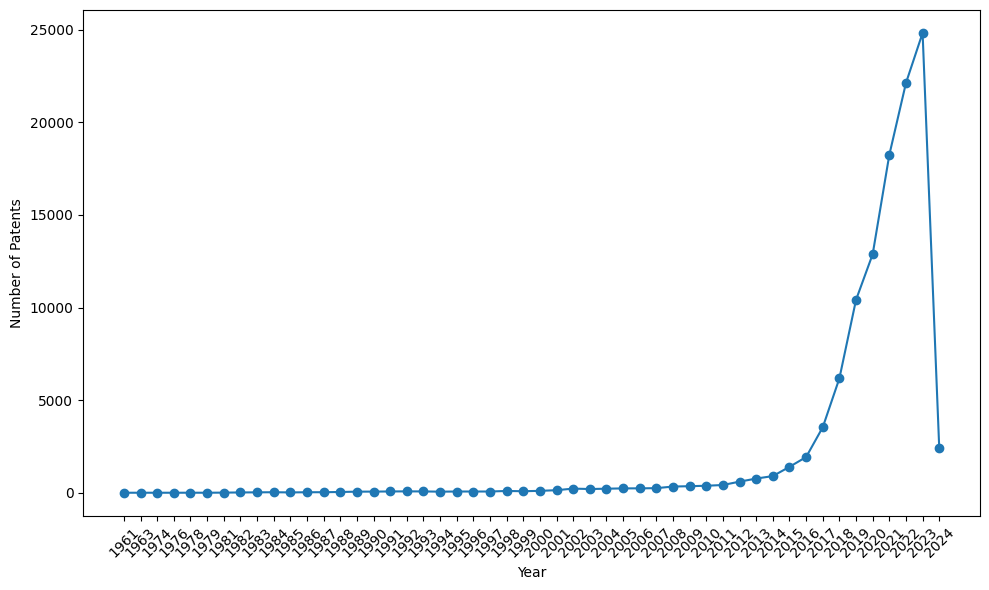

In [4]:
# Convert the date_column to datetime format
data['publication_date'] = pd.to_datetime(data['publication_date'], format='%Y%m%d')

# Extract year from the 'date' column
data['year'] = data['publication_date'].dt.to_period('Y')

# Group by year and count the number of data points
yearly_data = data.groupby('year').size()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index.astype(str), yearly_data.values, marker='o', linestyle='-')
# plt.title('Number of Patents Overtime')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [23]:
sum_result = sum(yearly_data[0:42])

print("Sum of elements from index 0 to index 41:", sum_result)
print(9655/164123)

Sum of elements from index 0 to index 41: 9655
0.05882783034675213


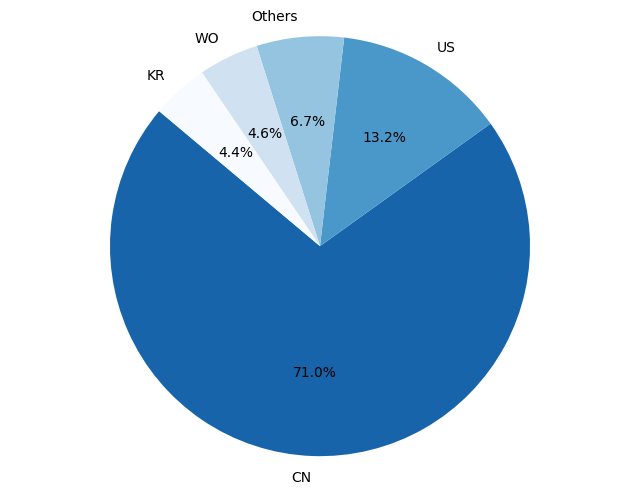

In [24]:
# Get value counts for the 'country_code' column
country_data = data['country_code'].value_counts()

# Calculate the threshold for filtering out values under 3%
threshold = 0.03 * country_data.sum()

# Filter out values under 3% and sum them
under_threshold_sum = country_data[country_data < threshold].sum()

# Filter out values under 3% and append them to a new 'others' category
country_data_filtered = country_data[country_data >= threshold]
country_data_filtered['Others'] = under_threshold_sum

# Sample data
country_data_filtered = country_data_filtered.sort_values(ascending=False)  # Sort values for better visualization

# Define a range of blue colors from dark to light
num_colors = len(country_data_filtered)
colors = plt.cm.Blues_r(np.linspace(0.2, 1, num_colors))  # Adjust the parameters to control the gradient

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(country_data_filtered, labels=country_data_filtered.index, autopct='%1.1f%%', startangle=140, colors=colors)
# plt.title('Pie Chart of Country Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
print(country_data)

country_code
CN    84721
US    42486
WO    14686
EP     8176
KR     4870
JP     2399
CA     2193
TW     1643
AU     1108
RU      511
GB      338
SE      190
DE      184
MX      121
ES       65
NL       56
FR       51
LU       39
UA       32
RO       30
NZ       26
SG       25
SK       24
DK       17
MY       16
CZ       14
GR       12
PH       12
ZA       10
BG        9
EA        8
IL        7
RS        7
IE        5
LT        4
FI        4
HK        4
PL        3
BE        3
SA        3
LV        3
CR        2
IT        2
CH        2
TN        1
JO        1
Name: count, dtype: int64


In [15]:
machine_learning = data['title_and_abstract'].str.contains('machine learning|supervised learning|Unsupervised learning|Reinforcement learning|Deep learning', case=False).sum()
knowledge_based_system = data['title_and_abstract'].str.contains('knowledge based system|Expert system|Intelligent agent|Case based reasoning|Linked system', case=False).sum()
computer_vision = data['title_and_abstract'].str.contains('computer vision|Scene reconstruction|Motion analysis|Image restoration|Image recognition', case=False).sum()
robotic = data['title_and_abstract'].str.contains('robotic|Climbing robot|Actuation robot|Sensing robot|Locomotion robot', case=False).sum()
natural_language_processing = data['title_and_abstract'].str.contains('natural language processing|Text processing|Speech processing', case=False).sum()
automated_planning_and_scheduling = data['title_and_abstract'].str.contains('automated planning and scheduling|Automated planning|Automated scheduling', case=False).sum()
optimisation = data['title_and_abstract'].str.contains('optimisation|Evolutionary algorithm|Genetic algorithm|Differential evolution|Particle swarm optimisation', case=False).sum()

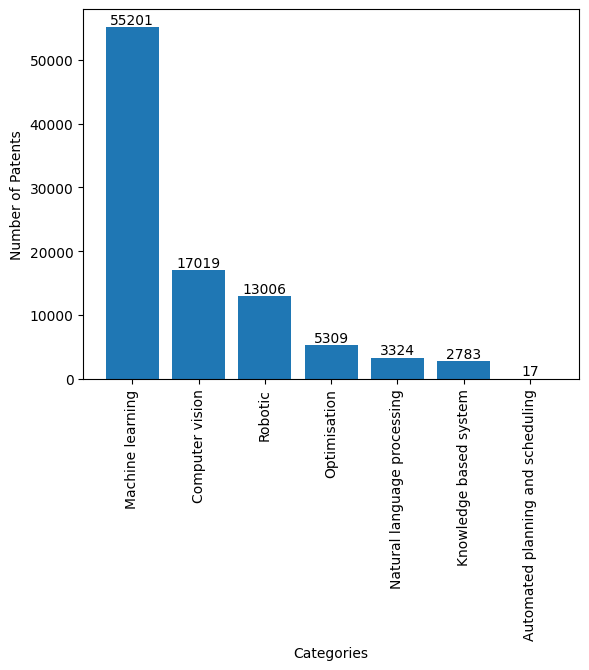

In [16]:
categories = ['Machine learning', 'Knowledge based system', 'Computer vision', 'Robotic', 'Natural language processing', 'Automated planning and scheduling', 'Optimisation']
values = [machine_learning, knowledge_based_system, computer_vision, robotic, natural_language_processing, automated_planning_and_scheduling, optimisation]

# Sort categories and values based on values
sorted_categories, sorted_values = zip(*sorted(zip(categories, values), key=lambda x: x[1], reverse=True))

# Create bar chart
plt.bar(sorted_categories, sorted_values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Number of Patents')
# plt.title('Bar Chart of Patent Categories')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Display the values on each bar
for i, value in enumerate(sorted_values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Show the chart
plt.show()

In [5]:
# hasile

export_data = data[['title_and_abstract']]
export_data.to_excel('patent.xlsx', index=False)